Complete programming questions from [post-summer assessment prompts](https://drive.google.com/file/d/1HDx4BbrnntpP17JRmc1SrHUWljHHf4lZ/view?usp=sharing):
- [x] Q1: [Prior Experience](#q1)
- [ ] Q2: Maze Algorithm 
- [x] Q3: [Right Triangle Check](#q3)
- [x] Q4: [Create a Fibonnaci list of n numbers](#q4)
- [x] Q5: [Soduko Check](#q5)
- [ ] Q6: Histogram of San Francisco's buildings
- [x] Q7: [Pig Game](#q7)
- [x] Q8: [Donut Check](#q8)

<a id = "q1"> </a>
### Question 1: Prior experience 
Before this summer: 
- I’m familiar with Python (4 months, with some libaries: numpy, pandas) and Java (3 months, making a simple shooting game)
- I knew HTML, basic CSS and JavaScript
- I practiced some basic sorting (QuickSort, MergeSort, BubbleSort, TreeSort) and graphing (dfs, bfs, shortest path) algorithms
- I mostly used Visual Studio Code, and IntelliJ IDEA for Java. I used Sublime Text some time.
Minerva’s summer prep helped me brush up my rusty Python and encouraged me to take MOOCs to learn more about Data Science and algorithms with Py.

<a id = "q2"> </a>
### Question 2:

That pseudocode does not work. There are some [particular situations](https://drive.google.com/file/d/1ckH8OnzQYy-AjotpgPk0L3n9JM-IqCfe/view?usp=sharing) it would fall into a repeated loop. 
The first thing I thought of was Depth First Search (DFS). Shortest Path may work too.

<a id = "q3"></a> 
### Question 3: Check Right Tringle

In [5]:
def is_right_triangle(a, b, c):
    side_list = [a, b, c]
    longest_line = max(a, b, c)
    side_list.remove(longest_line)
    hypot = (side_list[0]**2 + side_list[1]**2)**0.5 
    return hypot == longest_line 

is_right_triangle(4, 5, 3)

True

<a id = "q4"> </a>
### Question 4: List of Fibonacci Numbers

In [2]:
def fibonacci_nums(n):
    a, b = 0, 1 #first 2 fib nums are 0 and 1
    for i in range(n):
        yield a #call out a
        a, b = b, a + b #substitute to start a new iteration

list(fibonacci_nums(8))

[0, 1, 1, 2, 3, 5, 8, 13]

<a id = "q5"> </a>
### Question 5: Sodoku Check

In [3]:
def check_sudoku(sudoku_lst):
    is_sudoku = True

    # Check duplicates in rows
    for row in sudoku_lst:
        for cell in row:
            if row.count(cell) > 1: 
                is_sudoku = False 
                
    # Check duplicates in columns
    for i in range(len(sudoku_lst)): # i is current column's index
        # create an array to check if a number has existed in the column before, redefine it every column iteration
        existed = [False] * (len(sudoku_lst)+1)
        for j in range(len(sudoku_lst)): #j is current row's index
            if existed[sudoku_lst[j][i]]:
                is_sudoku = False
            existed[sudoku_lst[j][i]] = True
            
    return is_sudoku

sample_sudoku_lst = [
    [1, 2, 3],
    [1, 3, 2],
    [3, 1, 2]
]

print(check_sudoku(sample_sudoku_lst))

False


<a id = "q8"> </a>
### Question 8: Donuts

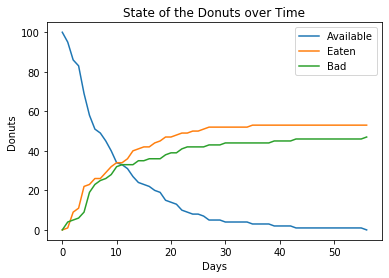

9.77


In [3]:
from matplotlib import pyplot as plt
from random import randint
from math import log


def is_sucessful(percent):
    rand = randint(0, 100)
    return rand < percent

def donuts(n_donuts):
    fig, ax = plt.subplots()
    available_history = [n_donuts]
    bad_history = [0]
    eaten_history = [0]
    day = 1

    while available_history[day - 1] > 0:
        n_available = available_history[day - 1]
        n_eaten = eaten_history[day - 1]
        n_bad = bad_history[day - 1]

        for i in range(n_available):
            if is_sucessful(4):
                n_available -= 1
                n_bad += 1
                continue

            if is_sucessful(5):
                n_available -= 1
                n_eaten += 1
                continue

        available_history.append(n_available)
        eaten_history.append(n_eaten)
        bad_history.append(n_bad)
        day += 1

    ax.plot(range(day), available_history, label="Available")
    ax.plot(range(day), eaten_history, label="Eaten")
    ax.plot(range(day), bad_history, label="Bad")
    ax.set_xlabel("Days")
    ax.set_ylabel("Donuts")
    ax.set_title("State of the Donuts over Time")
    ax.legend()
    plt.show()

    n_lose_half = log(day, 2)
    half_life = day / n_lose_half
    print("%.2f" % half_life)


donuts(100)


<a id = "q7"> </a>
### Question 7: Pig Game 

In [ ]:
from matplotlib import pyplot as plt
from random import randint

# return a tuple of 2 random numbers from 1 to 6
def role():
    return [randint(1, 6), randint(1, 6)]

# check game over when someone scores 24 or more scores
def game_over(scores):
    for player_scores in scores:
        return player_scores[-1] >= 24
    
def pig_game(players):
    fig, ax = plt.subplots()
    history = []
    scores = []
    turn = 0

    for player in range(players):
        scores.append([])

    while not game_over(scores):
        # Each loop iteration is the simulation of a round
        for player in range(players):
            dice_1, dice_2 = role()
            player_score = 0
            if dice_1 == 1 and dice_2 == 1:
                player_score = 0
            elif dice_1 == 1 or dice_2 == 1:
                if turn == 0:
                    player_score = 0
                else:
                    player_score = scores[player][turn - 1]
            else:
                if turn == 0:
                    player_score = dice_1 + dice_2
                else:
                    player_score = scores[player][turn - 1] + dice_1 + dice_2

            scores[player].append(player_score)

        turn += 1

    for player in range(players):
        ax.plot(range(1, turn + 1), scores[player], label=("Player " + str(player + 1)))

    ax.set_xlabel("Turns")
    ax.set_ylabel("Points")
    ax.set_title("Pig game")
    ax.legend()
    plt.show()


# demo
pig_game(4)